<a href="https://colab.research.google.com/github/rayclimaco/introducao_deeplearning/blob/main/deep_learning_ocean_9_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras #importa biblioteca Keras
from keras.datasets import mnist #Base de Dados Mnist
from tensorflow.python.keras import Sequential # Arquitetura da nossa rede neura
from tensorflow.python.keras.layers import Dense, Dropout # Neurônio (base da rede) e Regularizador (evita overfitting)
from tensorflow.compat.v1.keras.optimizers import RMSprop # Otimizador (back propagation)

In [2]:
# Carregando os dados de treino e teste
(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

In [3]:
# analisar o conteúdo do dataset e a estrutura

print("Quantidade de imagens para treino:", len(x_treino))

print("Quantidade de imagens para teste:", len(x_teste))

print("tipo de x_treino:", type(x_treino))

primeira_imagem = x_treino[0]

representacao_primeira_imagem = y_treino[0]

print("O que a primeira imagem representa:", representacao_primeira_imagem)

print("Formato da primeira imagem:", primeira_imagem.shape)

print(primeira_imagem)

Quantidade de imagens para treino: 60000
Quantidade de imagens para teste: 10000
tipo de x_treino: <class 'numpy.ndarray'>
O que a primeira imagem representa: 5
Formato da primeira imagem: (28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64 

A imagem representa: 7


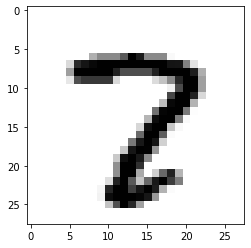

In [4]:
import matplotlib.pyplot as plt

indice = 12000

print("A imagem representa:", y_treino[indice])

plt.imshow(x_treino[indice], cmap=plt.cm.binary)

In [5]:

# Fluxo para construção de rede neural
# - Organizar a camada de entrada (input)
# - Organizar a camada de saída (output)
# - Estruturar a nossa rede neural
# - Treinar o modelo
# - Fazer as previsões

In [6]:
# Achatando a matriz de pixels e transformando em única lista

quantidade_treino = len(x_treino) #60000
quantidade_teste = len(x_teste) #10000

resolucao_imagem = x_treino[0].shape #(28,28)
resolucao_total = resolucao_imagem[0] * resolucao_imagem[1] #28*28= 784

x_treino = x_treino.reshape(quantidade_treino, resolucao_total)
x_teste = x_teste.reshape(quantidade_teste, resolucao_total)

In [7]:
print("Quantidade de itens em x_treino[0]:", len(x_treino[0]))

#como ficou
print(x_treino[0])

Quantidade de itens em x_treino[0]: 784
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 25

In [8]:
# Normalização dos dados

# 255 vire 1
# 127 vire 0.5
# 0 vire 0
# E assim por diante

x_treino = x_treino.astype('float32') #converte a base de uint_8 para float 32
x_teste = x_teste.astype('float32')

x_treino /= 255 #divide todos os valores de x_treino por 255 e armazena direto em x_treino
x_teste /= 255 #divide todos os valores de x_teste por 255 e armazena direto em x_teste

In [9]:
#Acesso a primeira image e exibição do valor do pixel 350 da imagem
#Cada linha possui 28 pixels (0-27), então ao acessar o indice 28, estamos acessando o 1 pixel da segunda linha

print(x_treino[0][350], type(x_treino[0][350]))

print(x_treino[0])

0.27450982 <class 'numpy.float32'>
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.       

In [10]:
#preparação da camada de saída (output)

#Possibilidade de sáida: num de 0 a 9
#Há 10 itens e a saída: Número -> =[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
#Número 2-> =[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
#Número 7-> =[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

valores_unicos = set(y_treino) #lista de numeros
print(valores_unicos)

quant_valores_unicos = len(valores_unicos)
print(quant_valores_unicos)

print("y_treino[0] antes:", y_treino[0])

y_treino = keras.utils.to_categorical(y_treino, quant_valores_unicos)
y_teste = keras.utils.to_categorical(y_teste, quant_valores_unicos)

print("y_treino[0] depois:", y_treino[0])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
10
y_treino[0] antes: 5
y_treino[0] depois: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [11]:
#Criando modelo de rede neural

model = Sequential()

#Primeira hidden layer = 30 neurônios
#Função de ativação: RelU
#Por ser a primeira hidden layer, é necessário informar o formato da camada de entrada (input)

model.add(Dense(30, activation='relu', input_shape=(resolucao_total,)))

#Add um regularizador, que ajuda a evitar o overfitting
#No caso será o Dropout
model.add(Dropout(0.2))

#Segunda Hidden layer = 20 neurônios
model.add(Dense(20, activation='relu'))

#Regularizador da segunda hidden layer
model.add(Dropout(0.2))

#Finalizamos o Output, informando a quantidade de valores únicos = 10
#Função de ativação: RelU é utilizado apenas nas hidden layers, iremos utilizar a função Softmax
model.add(Dense(quant_valores_unicos, activation='softmax'))

#Exibe o resumo do modelo criado
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [12]:
#Compilar o modelo
#Precisamos informar: função de perda, algoritas de backpropagation
#Dados de treino (imagens normalizadas e labels categorizadas)
#Dados de teste  (imagens normalizadas e labels categorizadas)
#Quantidade de épocas que queremos rodas (1 época equivale a analizar TODAS as imagens treino)
#Tamanho de uma batch
#   -> Supondo que temos 100 imagens
#   -> 100 imagens pode ser muito pesado para processar de uma única vez
#   -> Portanto, quebramos em 'batches' de 10 imagens, cada, e processamos 10 imagens por vez
#   -> Geralmente, o tamanho dos batches deve ser potência de 2 (2, 4, 8, 16, 32, 64, 128, ...), para melhorar performance

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Treina o modelo

history = model.fit(x_treino, y_treino,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_teste, y_teste))

Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 1.2948 - accuracy: 0.5674 - val_loss: 0.3214 - val_accuracy: 0.9110
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.5019 - accuracy: 0.8466 - val_loss: 0.2424 - val_accuracy: 0.9285
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4016 - accuracy: 0.8797 - val_loss: 0.2117 - val_accuracy: 0.9362
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3654 - accuracy: 0.8930 - val_loss: 0.2039 - val_accuracy: 0.9420
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3439 - accuracy: 0.9006 - val_loss: 0.1918 - val_accuracy: 0.9449
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3214 - accuracy: 0.9059 - val_loss: 0.1842 - val_accuracy: 0.9494
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3090 - accuracy: 0.9098 - val_loss: 0.1756 - val_accuracy: 0.9504
Epoch 

Valor categórico em y_teste[indice]: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Previsão: [[1.1769292e-04 3.7590200e-07 4.8678794e-05 1.2882112e-03 2.2117672e-06
  9.8957974e-01 8.3552225e-04 4.0102501e-07 7.9116253e-03 2.1563018e-04]]
Previsão ajustada: [5]


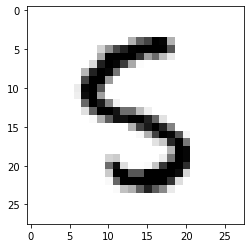

In [13]:
#Fazendo previsões

indice = 1235

print("Valor categórico em y_teste[indice]:", y_teste[indice])


imagem = x_teste[indice].reshape((1, resolucao_total))

# Como o model.predict aceita mais de uma imagem ao mesmo tempo
# e queremos apenas analisar uma imagem, precisamos fazer um reshape, em que [0, 0, 0, 0], vira [[0, 0, 0, 0]]
imagem = x_teste[indice].reshape((1, resolucao_total))

# Fazemos a previsão da imagem
prediction = model.predict(imagem)
print("Previsão:", prediction)

# Transformar a previsão em algo que conseguimos entender de forma mais fácil

import numpy as np
# Convertemos a previsão que está em porcentagens, pegando o maior valor disponível
prediction_class = np.argmax(prediction, axis=-1)
print("Previsão ajustada:", prediction_class)

# Recarregamos o MNIST e exibimos a imagem original usando o matplotlib carregado anteriormente
(x_treino_img, y_treino_img), (x_teste_img, y_teste_img) = mnist.load_data()
plt.imshow(x_teste_img[indice], cmap=plt.cm.binary)